In [1]:
import numpy as np
import pandas as pd
import math
from scipy.stats import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt

## Question 1

Text(0, 0.5, 'Credit Spread')

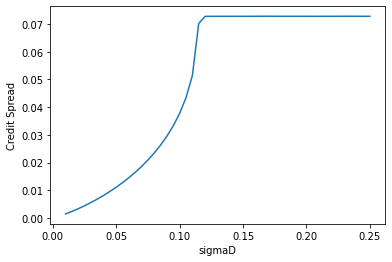

In [161]:
def f_sigmaD(sigmaV, D, E, r, T):
    V = E + D
    d1 = (math.log(V / D) + (r + 0.5 * sigmaV ** 2) * T) / (sigmaV * math.sqrt(T))
    return sigmaV * (1 + (E / D)) *  norm.cdf(-d1)
 
""" 
def fonction_objectif(sigmaV, D, E, r, T, sigmaD):
    sigmaD_estime = f_sigmaD(sigmaV, D, E, r, T)[0]
    return (sigmaD - sigmaD_estime) ** 2

def get_sigmaV(D, E, r, T, sigmaD_observed):
    result = minimize(lambda sigmaV: fonction_objectif(sigmaV, D, E, r, T, sigmaD_observed), x0=[0.2])
    return result.x[0]
"""


D = 60# Debt
E = 100   # Equity
r = 0.00  # Risk-free rate
T = 10 # Time to maturity


# Calculate Credit spread
def f_get_creditSpread(D, E, r, T, sigmaV):
    V = D + E
    d1 = (math.log(V / D) + (r + 0.5 * sigmaV ** 2) * T) / (sigmaV * math.sqrt(T))
    d2 = d1 - (sigmaV * np.sqrt(T))
    return -(math.log(norm.cdf(d2) + V / D * np.exp(-r*T) * norm.cdf(-d1)))/ T


sigmaD = np.linspace(0.01, 0.25, 49)
sigmaV = [get_sigmaV(D, E, r, T, sigmaD_observed) for sigmaD_observed in sigmaD]
res = [f_get_creditSpread(D, E, r, T, sigmaV_tmp) for sigmaV_tmp in sigmaV]

plt.plot(sigmaD,  res)
plt.xlabel("sigmaD")
plt.ylabel("Credit Spread")



#### Gunar Version

In [197]:
def d1(V, F, r, sigmaV, T):
    d1 = (math.log(V / F) + (r + 0.5 * sigmaV ** 2) * T) / (sigmaV * math.sqrt(T))
    return d1


def d2(d1, sigmaV, T):
    return  d1 - (sigmaV * np.sqrt(T))


def f_get_creditSpread2(V, F, r, sigmaV, T):
    d1_t = d1(V, F, r, sigmaV, T)
    d2_t = d2(d1_t, sigmaV, T)
    return (-1/T) * math.log(np.exp(-r * T) * norm.cdf(d2_t) + (V/F) * norm.cdf(-d1_t)) - r


# On fixe v à 1
def put_value(V, F, sigmaV, r, T):
    d1_t = d1(V, F, r, sigmaV, T)
    d2_t = d2(d1_t, sigmaV, T)
    return F * np.exp(-r * T) * norm.cdf(-d2_t) - V * norm.cdf(-d1_t)


def f_sigmaD2(V, F, sigmaV, r, T):
    P = put_value(V, F, sigmaV, r, T)
    d1_t = d1(V, F, r, sigmaV, T)
    D = F * np.exp(-r * T) - P
    return sigmaV * V * norm.cdf(-d1_t) / D

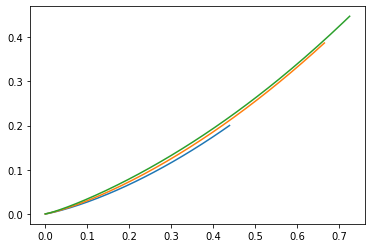

In [231]:
V_arr = [1/x for x in np.linspace(0.04, 0.98, 3)]
F = 1
T = 5
r = 0.05
sigmaV_array = np.linspace(0.01, 1.5 , 150)
for V in V_arr:
    plt.plot([f_sigmaD2(V, F, tmp, r, T) for tmp in sigmaV_array], [f_get_creditSpread2(V, F, r, tmp, T) for tmp in sigmaV_array])


In [14]:
V = D+E
sigmaV[-1] * norm.cdf(-(math.log(V / D) + (r + 0.5 * sigmaV[-1] ** 2) * T) / (sigmaV[-1] * math.sqrt(T)))

0.3157642040209876

In [41]:
sigmaD

array([0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045, 0.05 ,
       0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 , 0.095,
       0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 , 0.135, 0.14 ,
       0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175, 0.18 , 0.185,
       0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 , 0.225, 0.23 ,
       0.235, 0.24 , 0.245, 0.25 ])

In [42]:
sigmaV

[0.2638820485475006,
 0.29129460114578043,
 0.3158795652692498,
 0.33924759452241965,
 0.3622393393618431,
 0.38546463981320966,
 0.40940011337451127,
 1.0954336125940418,
 1.0424786758604176,
 0.9877066757509044,
 0.9297886213160953,
 0.8635465904291357,
 0.7054512182023718,
 0.7079598855327784,
 0.7081271051516232,
 0.7081934087381213,
 0.7081923219967814,
 0.7080611620815012,
 0.708229028931755,
 0.7082593550629965,
 0.7082122480862535,
 0.7081524624175038,
 0.7081804648011957,
 0.7081953080064919,
 0.7082042216561215,
 0.7082079977167156,
 0.7082091330516159,
 0.7082643748780311,
 0.7082241145049133,
 0.708255456093409,
 0.7082156180593757,
 0.7082095180378946,
 0.7082516390360769,
 0.7081998337292505,
 0.7081738972729059,
 0.708209568542197,
 0.7082097713853187,
 0.7082363919545921,
 0.7082646532970713,
 0.7082100391242636,
 0.7082108384709815,
 0.7082124586371291,
 0.7082154817759158,
 0.7082208087232872,
 0.7082297144307187,
 0.7082140931814127,
 0.7082157015177949,
 0.708217550

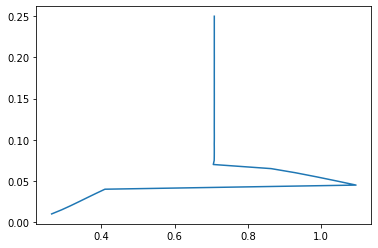

In [40]:
plt.plot(sigmaV, sigmaD)

## Archives

In [39]:
from scipy.stats import norm
import numpy as np

# Define the parameters
S = 100       # Example value for the underlying asset
D = 5         # Debt
T = 1         # Time until maturity in years
r = 0.05      # Risk-free rate
sigma_S = 0.2 # Initial volatility of the underlying asset
epsilon = 1e-5 # Tolerance threshold
n_max = 10000  # Maximum number of iterations to prevent infinite loops

# Present value function of a bond
def B(t, T, r):
    return np.exp(-r * (T - t))

# Initial values
V = S + D  # V_0, assuming S and D are known
sigma_V = sigma_S  # sigma_V_0, assuming sigma_S is known
Delta = float('inf')
n = 0

# Helper functions to calculate d1 and d2
def calculate_d1(V, sigma_V, K, T, r):
    return (np.log(V / K) + (r + 0.5 * sigma_V**2) * T) / (sigma_V * np.sqrt(T))

def calculate_d2(d1, sigma_V, T):
    return d1 - sigma_V * np.sqrt(T)

# Iterative loop to solve for V and sigma_V
while Delta >= epsilon and n < n_max:
    d1 = calculate_d1(V, sigma_V, D, T, r)
    d2 = calculate_d2(d1, sigma_V, T)
    
    # Update V and sigma_V using the functions defined
    V_next = (D * B(0, T, r) * norm.cdf(d2) + S ) / norm.cdf(d1)
    sigma_V_next = (1 / norm.cdf(d1)) * (S / V) * sigma_S
    
    # Calculate the change for convergence check
    Delta_V = np.abs(V_next - V)
    Delta_sigma_V = np.abs(sigma_V_next - sigma_V)
    Delta = max(Delta_V, Delta_sigma_V)
    
    # Update the variables for the next iteration
    V = V_next
    sigma_V = sigma_V_next
    n += 1

V, sigma_V, n # Show the final values and the number of iterations


(104.75614712250356, 0.19091958371294118, 3)

In [ ]:
from sympy import symbols, exp, diff, Function, sqrt

# Définir les symboles
t, r, u_D, sigma_D, u_V, sigma_V, Constant = symbols('t r u_D sigma_D u_V sigma_V Constant')
V = symbols('V', cls=Function)(t)  # V dépend de t
D_t = Constant * exp(-r*t) - Function('F')(V, t)  # D_t dépend de V et t

# Calculer les dérivées partielles nécessaires pour appliquer le lemme d'Ito
partial_t_D = diff(D_t, t)
partial_V_D = diff(D_t, V)
partial_VV_D = diff(partial_V_D, V)

# Appliquer le lemme d'Ito à D_t
dD_t = (partial_t_D + u_V * V * partial_V_D + (1/2) * sigma_V**2 * V**2 * partial_VV_D) * symbols('dt') + sigma_V * V * partial_V_D * symbols('dw')
dD_t